Importing libraries

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Linking with google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image plotting 

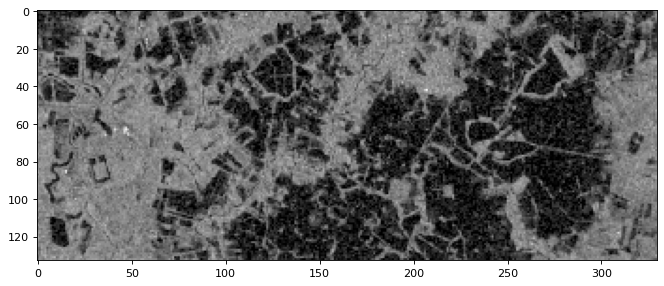

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

img=mpimg.imread('/content/drive/MyDrive/Intensity/Extract1.tif')
imgplot = plt.imshow(img)

Loading Datasets

In [ ]:
import numpy as np
from PIL import Image
import os
directory1 = "/content/drive/MyDrive/Coherence"
directory2 = "/content/drive/MyDrive/Intensity"

In [ ]:
def pixel_extraction(directory, i, j, check):
  arr =[]
  for img in os.listdir(directory):
    im = Image.open(os.path.join(directory,img)) #load an image file
    if check:
      im = im.convert('L')
    imarray = np.array(im) # convert it to a matrix
    arr.append(imarray[i][j])
  return np.array(arr)

In [ ]:
import time
ans = []
for i in range(133): # each image of size 133 x 330
  for j in range(330):
    arr_combine = []
    arr1 = pixel_extraction(directory1, i, j, False)
    arr2 = pixel_extraction(directory2, i, j, True)
    arr_combine.append(np.expand_dims(arr1, axis=1))
    arr_combine.append(np.expand_dims(arr2, axis=1))
    ans.append(np.concatenate((arr_combine[0], arr_combine[1]), axis=1))

In [ ]:
ans_data_new=np.array(ans)
arr1_data_new=np.array(arr1)
arr2_data_new=np.array(arr2)

NameError: ignored

Saving the dataset

In [ ]:
np.save("ans_data_new.npy",ans_data_new)
np.save("arr1_data_new.npy",arr1_data_new)
np.save("arr2_data_new.npy",arr2_data_new)

# **Loading the dataset from drive**

In [4]:
import numpy as np
ans_data = np.load('/content/drive/MyDrive/Time series_project/ans_data.npy')
arr1_data = np.load('/content/drive/MyDrive/Time series_project/arr1_data.npy')
arr2_data = np.load('/content/drive/MyDrive/Time series_project/arr2_data.npy')

In [5]:
ans_data.shape

(43890, 28, 2)

In [6]:
ans_data[43889][0][1]# [pixel location][image index][column:0=coh, col:1=intensity]

0.2980392156862745

Visualizing Tiff File Using Matplotlib and GDAL using Python
#https://www.geeksforgeeks.org/visualizing-tiff-file-using-matplotlib-and-gdal-using-python/
#https://towardsdatascience.com/reading-and-visualizing-geotiff-images-with-python-8dcca7a74510

# Plotting the label image

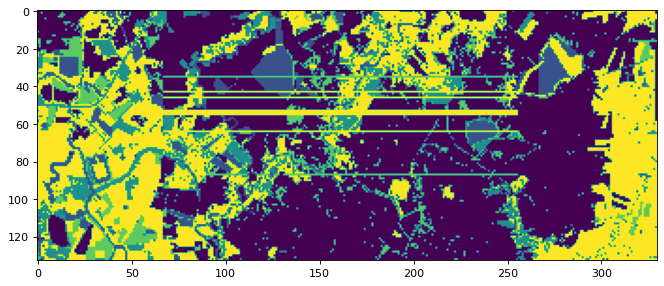

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)

img=mpimg.imread('/content/drive/MyDrive/Labels.tif')
imgplot = plt.imshow(img)

In [8]:
image_array=np.array(img)
image_array
#plt.imshow(image_array)

array([[17, 17, 17, ..., 85, 85, 17],
       [17, 17, 68, ..., 85, 85, 17],
       [17, 17, 17, ..., 85, 85, 85],
       ...,
       [51, 34, 85, ..., 85, 85, 85],
       [68, 68, 51, ..., 85, 51, 51],
       [68, 51, 17, ..., 85, 85, 85]], dtype=uint8)

In [9]:
image_array.shape

(133, 330)

In [19]:
image_array[18][162] # 6102, 6103, 6104,

85

In [18]:
6102%330

162

# storing the pixel location to their respective class

In [11]:
#[17 34 51 68 85] labels
#[21146  2771  3300  3428 13245] frequency of respective labels
d17=[]
d34=[]
d51=[]
d68=[]
d85=[]
for y in range(0,133):
  for x in range(0,330):
    if(image_array[y][x]==17):
      if(y==0):
        d17.append(x)
        continue
      d17.append((y*330)+x)
    if(image_array[y][x]==34):
      if(y==0):
        d34.append(x)
        continue
      d34.append((y*330)+x)
    
    if(image_array[y][x]==51):
      if(y==0):
        d51.append(x)
        continue
      d51.append((y*330)+x)
    
    if(image_array[y][x]==68):
      if(y==0):
        d68.append(x)
        continue
      d68.append((y*330)+x)

    if(image_array[y][x]==85):
      if(y==0):
        d85.append(x)
        continue
      d85.append((y*330)+x)
print(d17)
print(d34)
print(d51)
print(d68)
print(d85)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 69, 70, 71, 72, 73, 74, 75, 76, 77, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 125, 126, 127, 128, 143, 144, 145, 154, 155, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 206, 207, 208, 209, 210, 211, 212, 213, 218, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 313, 329, 330, 331, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 375, 377, 378, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 399, 400, 401, 4

In [ ]:
ans_data[6532][4][1]

0.13725490196078433

# **Checking whether total sum of labels equal to total pixel length**

In [ ]:
len(d17)+len(d34)+len(d51)+len(d68)+len(d85)

43890

# Finding the average value for each labels

In [20]:
d17_avg=[]
for i in range(0,28):
  sum=0
  for j in d17:
    sum+=ans_data[j][i][1]
  d17_avg.append(sum/len(d17))
print(d17_avg)
len(d17_avg)

[0.287650934770896, 0.2760344050605588, 0.22965507776926328, 0.23083177089993973, 0.2099979043920293, 0.21971429260247297, 0.23914910899568292, 0.2744198596869381, 0.29783855658969083, 0.29423503819377717, 0.28267043505185324, 0.3090830695277413, 0.3565617564531639, 0.3294824219292459, 0.2979021666359946, 0.2895722178022201, 0.277033249694407, 0.2854418301889271, 0.34829245043320667, 0.32608753706713334, 0.34606721152463255, 0.320791768897013, 0.37061753671476855, 0.307872438675574, 0.3140461367559603, 0.3128212260974775, 0.3619971700019285, 0.2141268083890692]


28

In [21]:
d34_avg=[]
for i in range(0,28):
  sum=0
  for j in d34:
    sum+=ans_data[j][i][1]
  d34_avg.append(sum/len(d34))
print(d34_avg)

[0.2996171835749826, 0.2601962907140482, 0.2917174376065845, 0.23230659279229565, 0.21039902066925667, 0.21544851791312064, 0.207993150345667, 0.21632878340798675, 0.20520234077030328, 0.19473680486268918, 0.17214709774202044, 0.18110401143496072, 0.19740024483268617, 0.20827477869531105, 0.21409698487839798, 0.2339425846123371, 0.23886471225083367, 0.23614324834950223, 0.25975191231310296, 0.22030413031325888, 0.22396388364078945, 0.1921398801310495, 0.22939832013642736, 0.19925134976401299, 0.24473362062255463, 0.26174878468168267, 0.27183928786238504, 0.29574797800751534]


In [22]:
d51_avg=[]
for i in range(0,28):
  sum=0
  for j in d51:
    sum+=ans_data[j][i][1]
  d51_avg.append(sum/len(d51))
print(d51_avg)

[0.48207011289364354, 0.4503065953654202, 0.4929780154486028, 0.40811051693404876, 0.3846642899584104, 0.37934759358288916, 0.3802507427213333, 0.37866666666666665, 0.3698276886512208, 0.3566856803327394, 0.32972786690433814, 0.3421580510992285, 0.3725763517528224, 0.37335947712418527, 0.3856530005941784, 0.4022222222222239, 0.39992513368984184, 0.3894759358288779, 0.4364052287581718, 0.37424598930481356, 0.38402733214498025, 0.3648484848484846, 0.41499821746880844, 0.36747355912061874, 0.43269043374925936, 0.4561342840166388, 0.4635793226381489, 0.4940475341651794]


In [23]:
d68_avg=[]
for i in range(0,28):
  sum=0
  for j in d68:
    sum+=ans_data[j][i][1]
  d68_avg.append(sum/len(d68))
print(d68_avg)

[0.4604056558445997, 0.43669778296382994, 0.4483194911570214, 0.3942446290067972, 0.37279497563319536, 0.3674171185393657, 0.36560276385933893, 0.3629956299906209, 0.3626867549820401, 0.356216395543049, 0.3301244651886429, 0.35097009632324433, 0.3835621296359876, 0.3801095934289728, 0.3880362413343417, 0.4048596334683247, 0.39168439838012464, 0.3893106367401107, 0.4360285537785734, 0.3786452970920005, 0.3884789621799733, 0.3668954629693201, 0.41957695563640013, 0.37261537053561417, 0.4207655524286753, 0.4402578534330903, 0.4623275447868772, 0.43271672729768446]


In [24]:
d85_avg=[]
for i in range(0,28):
  sum=0
  for j in d85:
    sum+=ans_data[j][i][1]
  d85_avg.append(sum/len(d85))
print(d85_avg)

[0.48311208817237317, 0.45391276027206523, 0.48321305116988106, 0.40692499574381996, 0.3764652588101772, 0.3597042169075823, 0.3624820316952541, 0.3572109342037879, 0.35626940243819627, 0.3416608561129222, 0.32119852848653185, 0.33369247736845226, 0.36919917986067674, 0.3757638472527352, 0.3845005514474326, 0.40179897704643314, 0.3918974973907706, 0.3773875454296234, 0.4330622728517255, 0.36171903567012387, 0.37668998290140354, 0.362378403985214, 0.4162280993937352, 0.35991384096105933, 0.4148412645540991, 0.440717103753512, 0.4566053042583283, 0.47449618427967777]


# DataFrame creation

In [25]:
df = pd.DataFrame(d17_avg,columns=['d17'])

In [26]:
df['d34']=d34_avg
df['d51']=d51_avg
df['d68']=d68_avg
df['d85']=d85_avg
df

,d17,d34,d51,d68,d85
0,0.287651,0.299617,0.482070,0.460406,0.483112
1,0.276034,0.260196,0.450307,0.436698,0.453913
2,0.229655,0.291717,0.492978,0.448319,0.483213
3,0.230832,0.232307,0.408111,0.394245,0.406925
4,0.209998,0.210399,0.384664,0.372795,0.376465
5,0.219714,0.215449,0.379348,0.367417,0.359704
6,0.239149,0.207993,0.380251,0.365603,0.362482
7,0.274420,0.216329,0.378667,0.362996,0.357211
8,0.297839,0.205202,0.369828,0.362687,0.356269
9,0.294235,0.194737,0.356686,0.356216,0.341661


In [ ]:
df['d17'].describe()

count    28.000000
mean      0.293214
std       0.045383
min       0.209998
25%       0.275631
50%       0.296037
75%       0.322116
max       0.370618
Name: d17, dtype: float64

In [ ]:
for col in df.columns:
    print(col)

d17
d34
d51
d68
d85


# Test for stationary:ADF test 

In [27]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary(hypothesis)
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
print("df['d17']-----------------------------------------------")
print(adfuller_test(df['d17']))
print("df['d34']-----------------------------------------------")
print(adfuller_test(df['d34']))
print("df['d51']-----------------------------------------------")
print(adfuller_test(df['d51']))
print("df['d68']-----------------------------------------------")
print(adfuller_test(df['d68']))
print("df['d85']-----------------------------------------------")
print(adfuller_test(df['d85']))
print("-----------------------------------------------")

df['d17']-----------------------------------------------
ADF Test Statistic : -2.2924286929500473
p-value : 0.17442149765103276
#Lags Used : 0
Number of Observations Used : 27
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None
df['d34']-----------------------------------------------
ADF Test Statistic : -0.5089142300225865
p-value : 0.8902651737292988
#Lags Used : 8
Number of Observations Used : 19
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None
df['d51']-----------------------------------------------
ADF Test Statistic : 1.264638972093805
p-value : 0.9964034184707324
#Lags Used : 9
Number of Observations Used : 18
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None
df['d68']-----------------------------------------------
ADF Test Statistic : -1.6926264556595854
p-value : 0.43491549713807276
#Lags Used : 1
Number of Obser

In [ ]:
import matplotlib.pyplot as plt

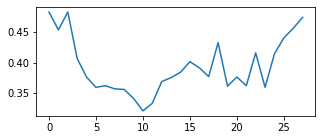

In [ ]:
df['d85'].plot(figsize=(5, 2),label=x)

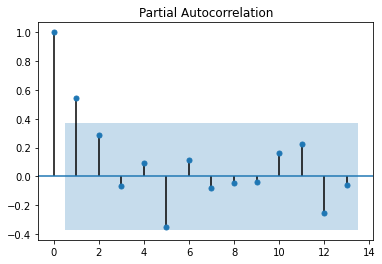

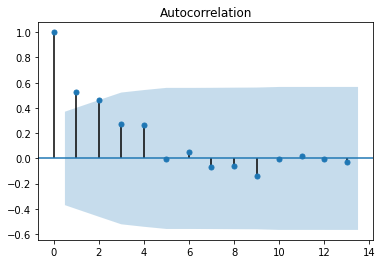

In [34]:
plot_pacf(df['d17'],lags=13).figsize=(1,1)
plot_acf(df['d17'],lags=13).figsize=(1,2)

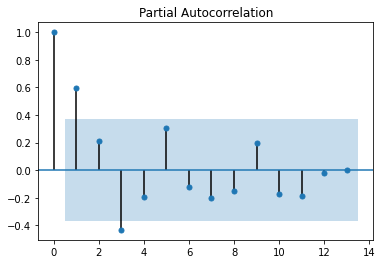

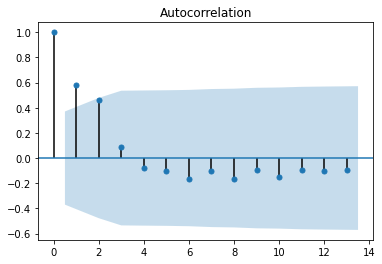

In [32]:
plot_pacf(df['d34'],lags=13).figsize=(1,1)
plot_acf(df['d34'],lags=13).figsize=(1,2)

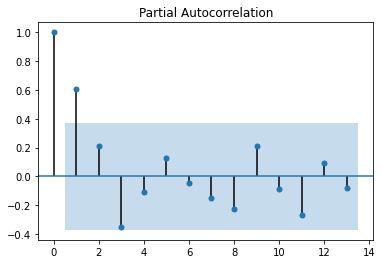

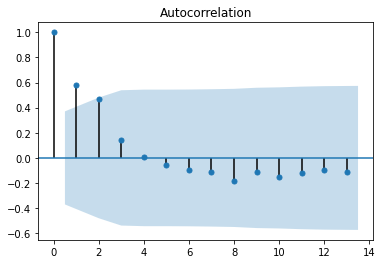

In [31]:
plot_pacf(df['d51'],lags=13).figsize=(1,1)
plot_acf(df['d51'],lags=13).figsize=(1,2)

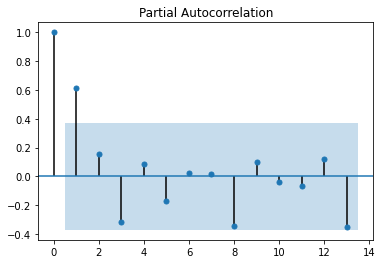

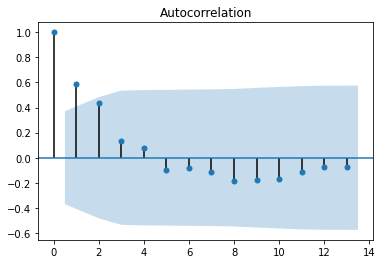

In [33]:
plot_pacf(df['d68'],lags=13).figsize=(1,1)
plot_acf(df['d68'],lags=13).figsize=(1,2)

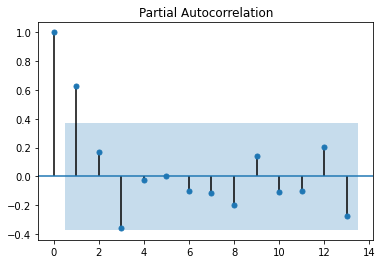

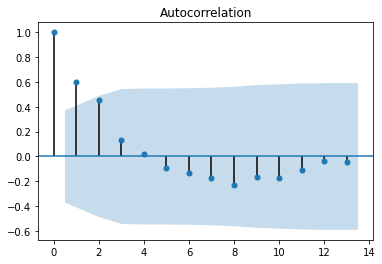

In [ ]:
plot_pacf(df['d85'],lags=13).figsize=(1,1)
plot_acf(df['d85'],lags=13).figsize=(1,2)

In [ ]:
d={}
#d[10]=1000

print(d)

{}


In [ ]:
for y in range(0,133):
  for x in range(0,330):
    if(y==0):      
        d[x]=image_array[0][x]
    d[(y*329) + 1+x]=image_array[y][x]


In [ ]:
print(d)

{0: 17, 1: 17, 2: 17, 3: 17, 4: 17, 5: 17, 6: 17, 7: 17, 8: 17, 9: 17, 10: 17, 11: 17, 12: 17, 13: 17, 14: 17, 15: 17, 16: 17, 17: 17, 18: 17, 19: 17, 20: 17, 21: 17, 22: 17, 23: 17, 24: 17, 25: 17, 26: 17, 27: 17, 28: 85, 29: 85, 30: 85, 31: 34, 32: 34, 33: 85, 34: 85, 35: 34, 36: 85, 37: 34, 38: 34, 39: 34, 40: 34, 41: 34, 42: 85, 43: 34, 44: 85, 45: 17, 46: 17, 47: 17, 48: 17, 49: 17, 50: 17, 51: 17, 52: 17, 53: 17, 54: 17, 55: 17, 56: 17, 57: 17, 58: 17, 59: 17, 60: 17, 61: 68, 62: 51, 63: 85, 64: 51, 65: 51, 66: 51, 67: 51, 68: 51, 69: 17, 70: 17, 71: 17, 72: 17, 73: 17, 74: 17, 75: 17, 76: 17, 77: 17, 78: 51, 79: 51, 80: 51, 81: 51, 82: 51, 83: 51, 84: 51, 85: 51, 86: 51, 87: 34, 88: 34, 89: 34, 90: 34, 91: 17, 92: 17, 93: 17, 94: 17, 95: 17, 96: 17, 97: 17, 98: 17, 99: 17, 100: 17, 101: 17, 102: 17, 103: 17, 104: 17, 105: 17, 106: 17, 107: 17, 108: 17, 109: 17, 110: 17, 111: 17, 112: 17, 113: 17, 114: 17, 115: 17, 116: 17, 117: 85, 118: 85, 119: 68, 120: 68, 121: 51, 122: 51, 12

In [ ]:
len(d)

43759

Location for time series with different labels:

Flooded Area(17): 

[100][275]=33176

[130][150]=42921

Waterbody(34): 

[28][130]=9343

[28][15]=9228

Dry(51):  

[95][49]=31305

[95][25]=31281

Non flooded: 

[126][28]=41483

[120][52]=39533

Flooded Veg(85): 

[80][2]=26323

[100][54]=32955

In [ ]:
#comparision
a=120 # row
b=52 #col
z=a*329+1+ b # 1 added extra if row greater than 0
print(z)
print(d[z])
print(image_array[a][b])

39533
68
68


In [ ]:
print(np.unique(image_array))

[17 34 51 68 85]


In [ ]:
arr_class=[]
#len(image_array)-> row print
#len(image_array[0])-> col print
for i in range(len(image_array)): 
  for j in range(len(image_array[0])):
    arr_class.append(image_array[i][j])

In [ ]:
'''
# counting unique value occurance
import numpy as np

words = ['b', 'a', 'a', 'c', 'c', 'c']
values, counts = np.unique(words, return_counts=True)
print(values)
print(counts)
'''

"\n# counting unique value occurance\nimport numpy as np\n\nwords = ['b', 'a', 'a', 'c', 'c', 'c']\nvalues, counts = np.unique(words, return_counts=True)\nprint(values)\nprint(counts)\n"

In [ ]:
values, counts = np.unique(arr_class, return_counts=True)
print(values)
print(counts)

[17 34 51 68 85]
[21146  2771  3300  3428 13245]


In [ ]:
#shape of an array
print(image_array.shape)

(133, 330)


In [ ]:
image_array[70][280]# flooded: 70*329+279+1=23310

17

In [ ]:
# creating dictionary
dict={}
dict[17]=23310
dict[34]=19977
dict[51]=42778
dict[68]=17775
dict[85]=42104

print(dict)

{17: 23310, 34: 19977, 51: 42778, 68: 17775, 85: 42104}


In [ ]:

for x in dict:
  print(x)

17
34
51
68
85


In [ ]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary(hypothesis)
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
def timeseries(val):
  df=pd.DataFrame(ans_data[val],columns=['coh','int'])
  print("--------------------------------------------------------------------------------------")
  print( x ,": label ")
  print("intensity desc.\n")
  print(df['int'].describe())
  print(". . . . . . . . . . . ")
  print(df['int'].plot(figsize=(10, 6),label=x))
  plt.legend()
  plot_pacf(df['int'],lags=13).figsize=(1,1)
  plot_acf(df['int'],lags=13).figsize=(1,1)
  plt.show()
  print("### Testing For Stationarity")
  print(". . . . . . . . . . .")
  adfuller_test(df['int'])
  print("--------------------------------------------------------------------------------------")


--------------------------------------------------------------------------------------
17 : label 
intensity desc.

count    28.000000
mean      0.377171
std       0.067267
min       0.270588
25%       0.315686
50%       0.384314
75%       0.426471
max       0.525490
Name: int, dtype: float64
. . . . . . . . . . . 
AxesSubplot(0.125,0.125;0.775x0.755)


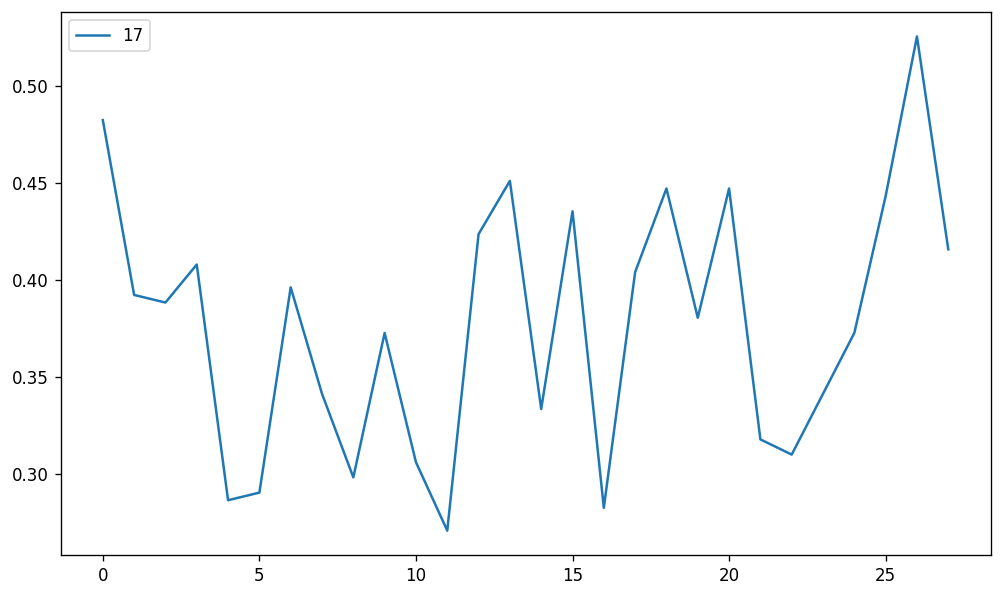

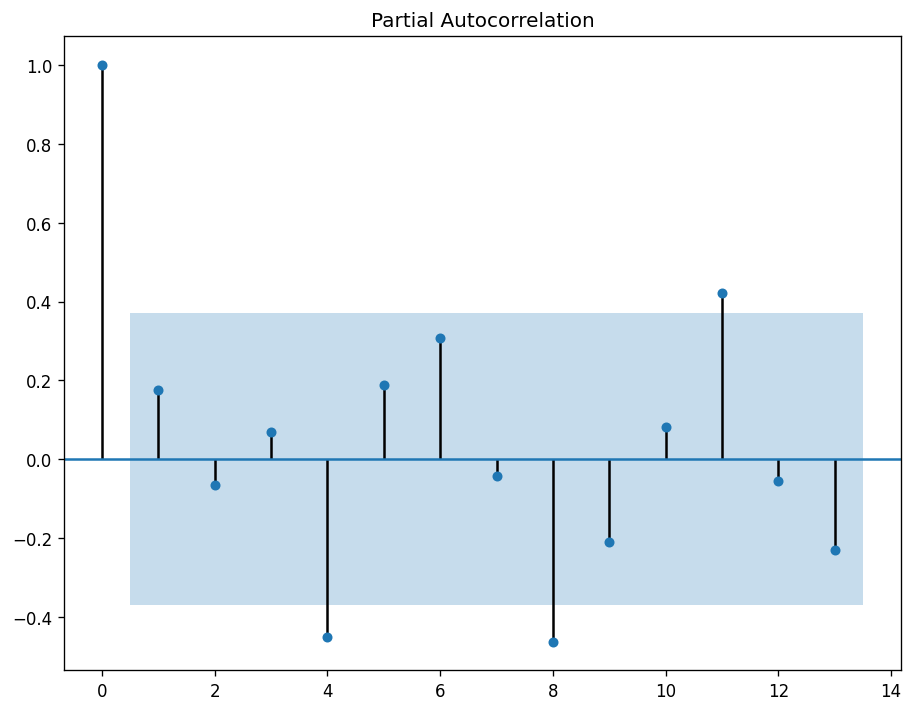

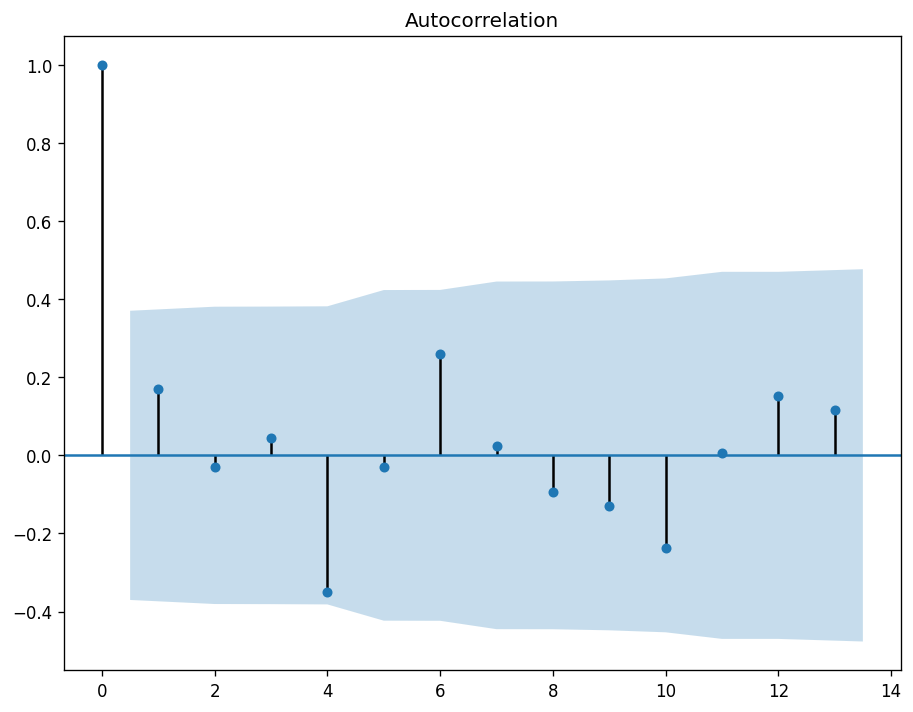

### Testing For Stationarity
. . . . . . . . . . .
ADF Test Statistic : -0.8800665034149268
p-value : 0.7944659119919897
#Lags Used : 5
Number of Observations Used : 22
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
34 : label 
intensity desc.

count    28.000000
mean      0.251961
std       0.130635
min       0.015686
25%       0.140196
50%       0.254902
75%       0.337255
max       0.474510
Name: int, dtype: float64
. . . . . . . . . . . 
AxesSubplot(0.125,0.125;0.775x0.755)


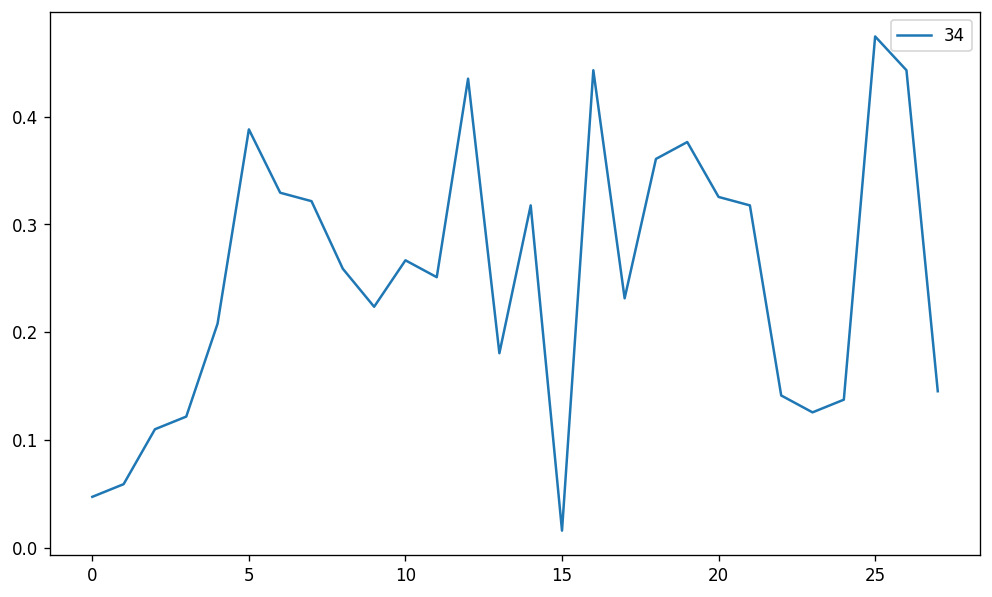

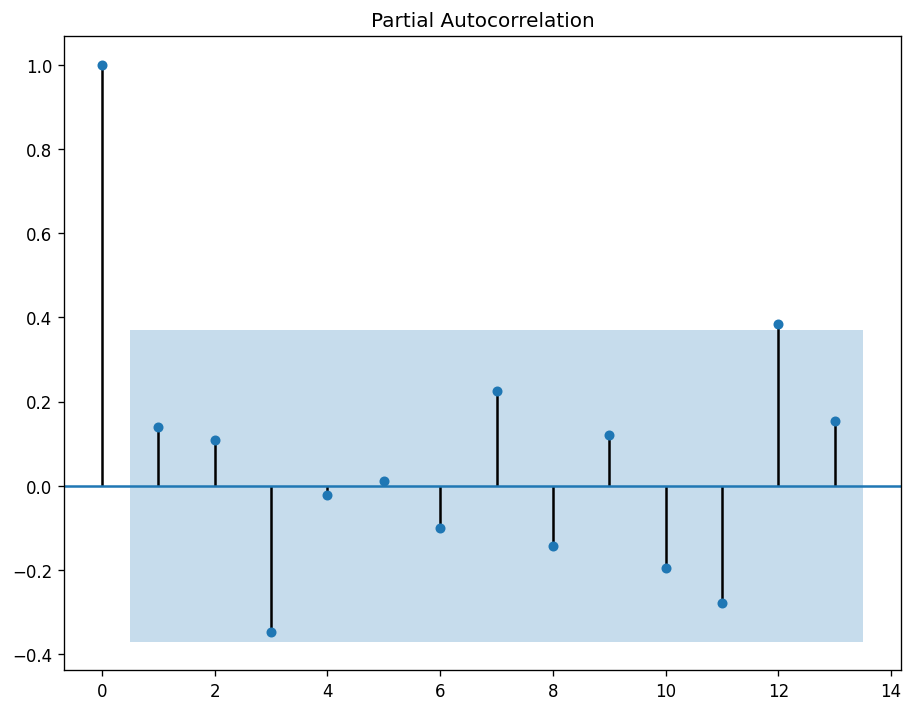

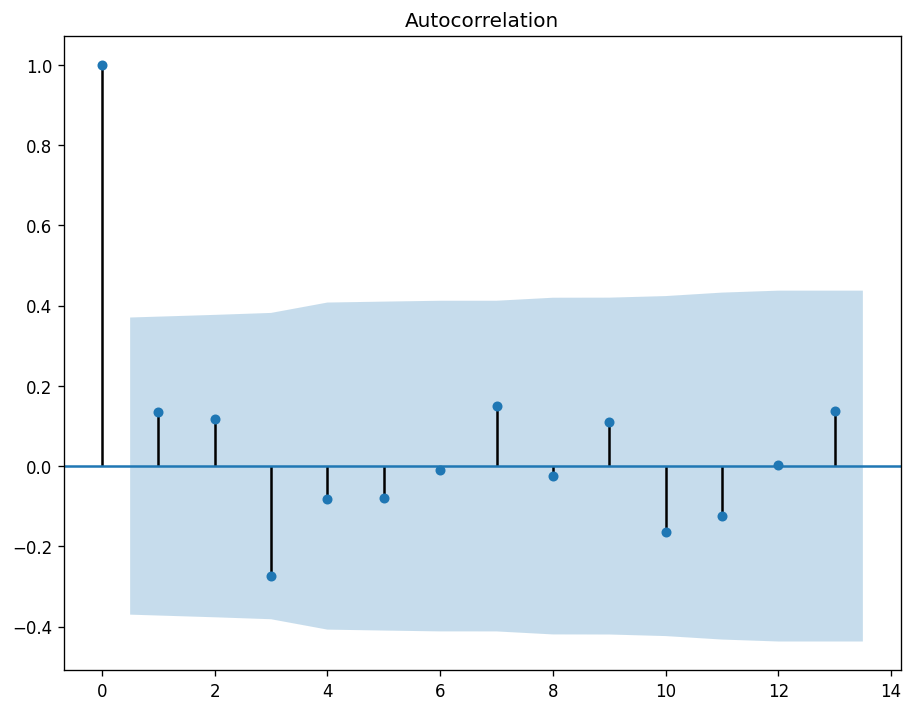

### Testing For Stationarity
. . . . . . . . . . .
ADF Test Statistic : -4.033557175374108
p-value : 0.0012446383006995416
#Lags Used : 2
Number of Observations Used : 25
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
51 : label 
intensity desc.

count    28.000000
mean      0.249440
std       0.090711
min       0.050980
25%       0.204902
50%       0.254902
75%       0.299020
max       0.427451
Name: int, dtype: float64
. . . . . . . . . . . 
AxesSubplot(0.125,0.125;0.775x0.755)


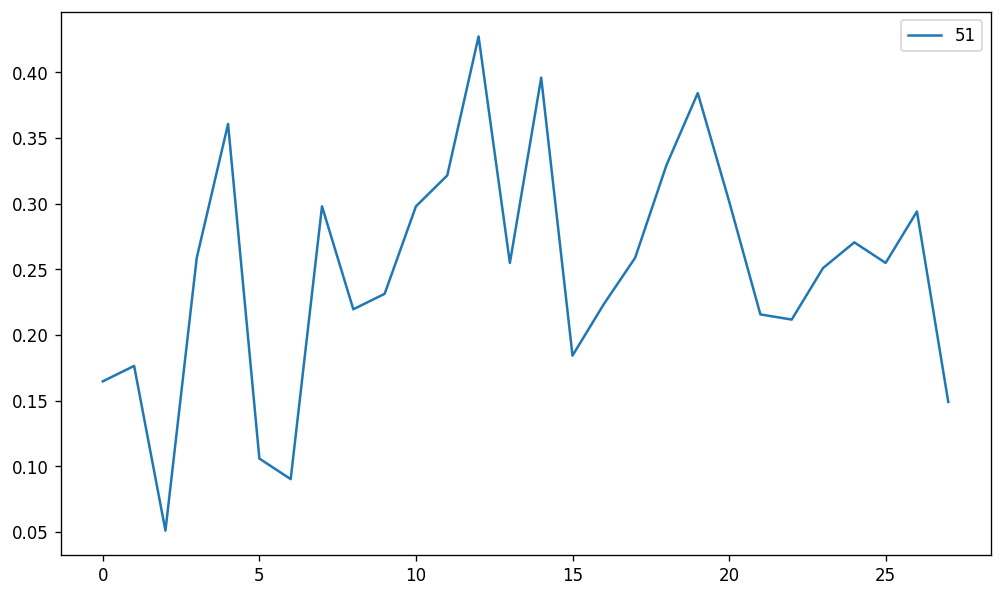

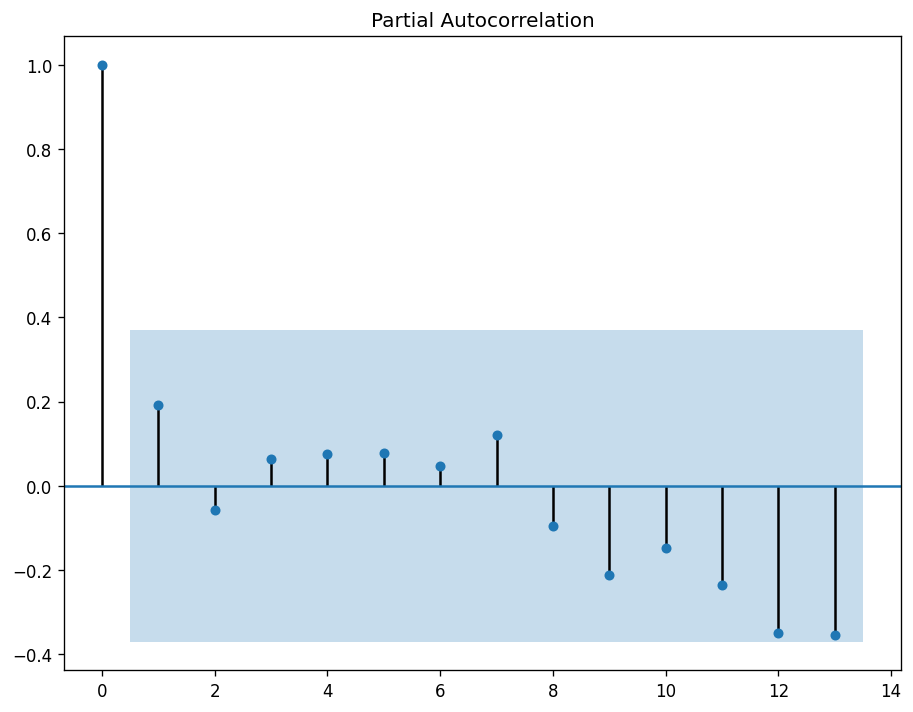

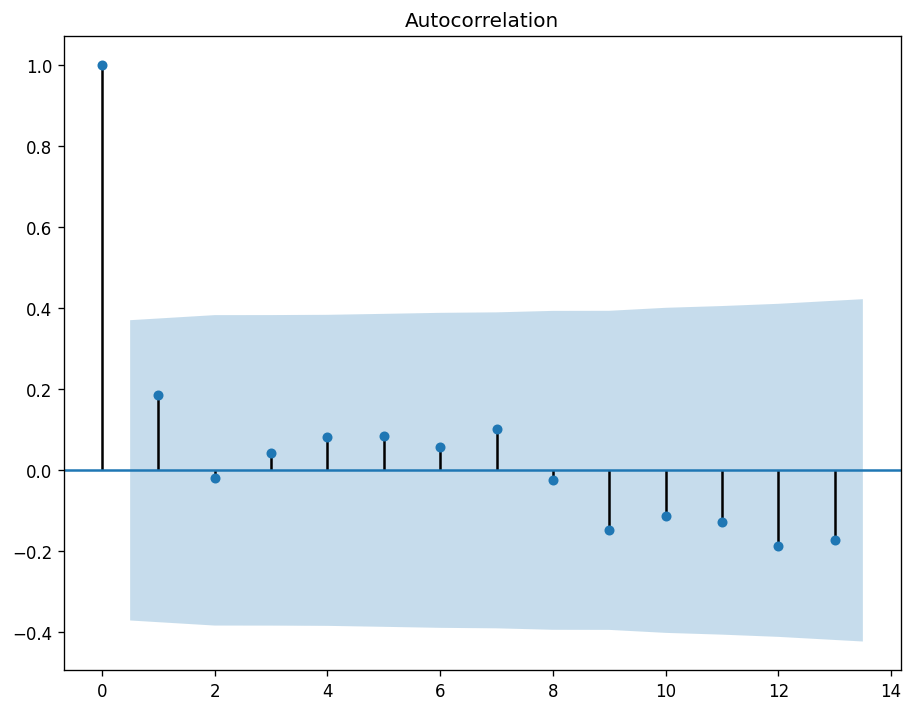

### Testing For Stationarity
. . . . . . . . . . .
ADF Test Statistic : -3.1995794397764086
p-value : 0.020009035805336382
#Lags Used : 2
Number of Observations Used : 25
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
68 : label 
intensity desc.

count    28.000000
mean      0.221569
std       0.161773
min       0.000000
25%       0.062745
50%       0.254902
75%       0.335294
max       0.501961
Name: int, dtype: float64
. . . . . . . . . . . 
AxesSubplot(0.125,0.125;0.775x0.755)


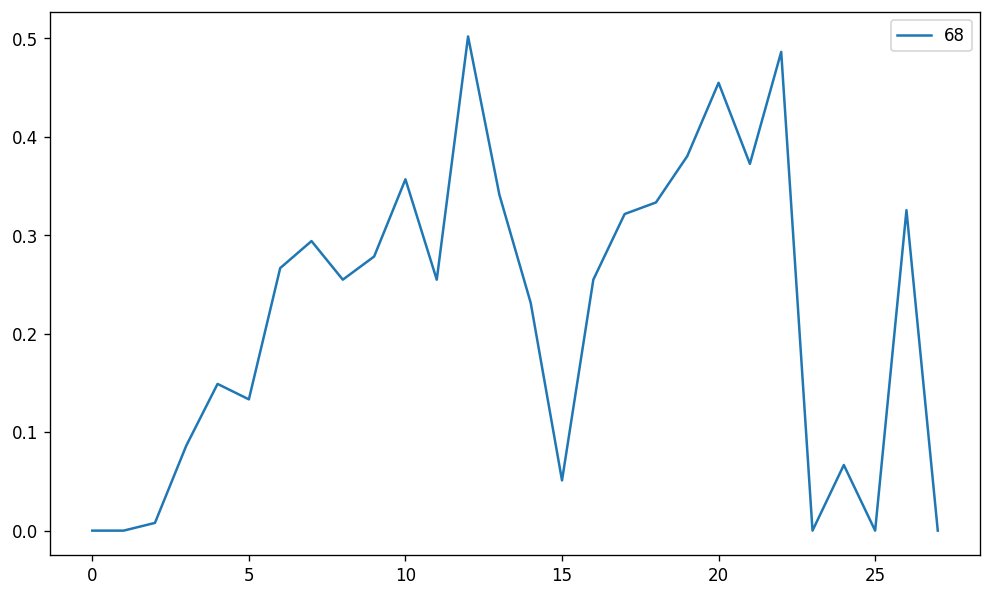

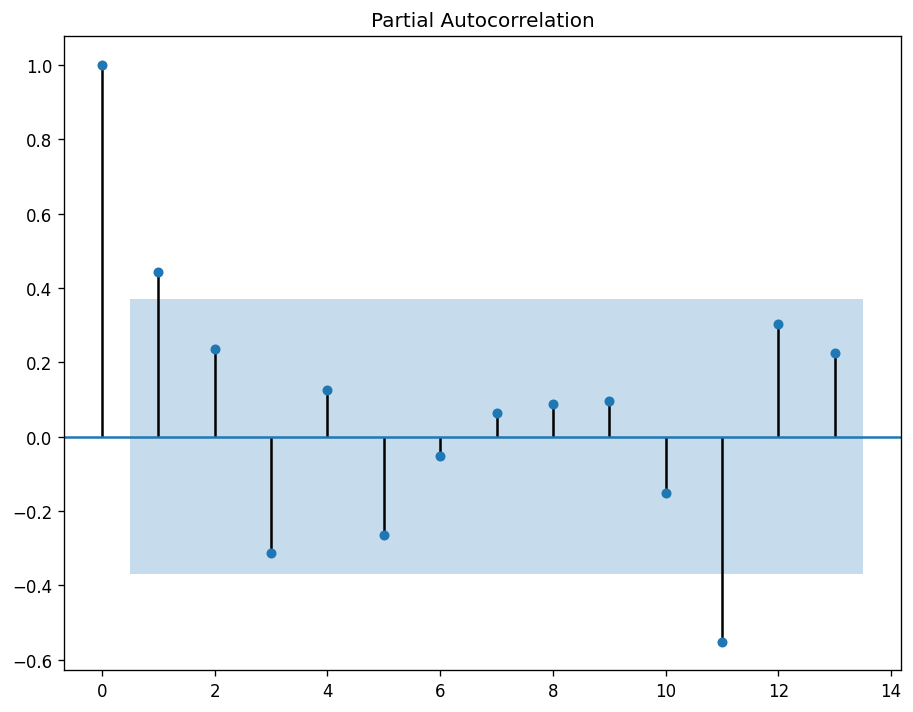

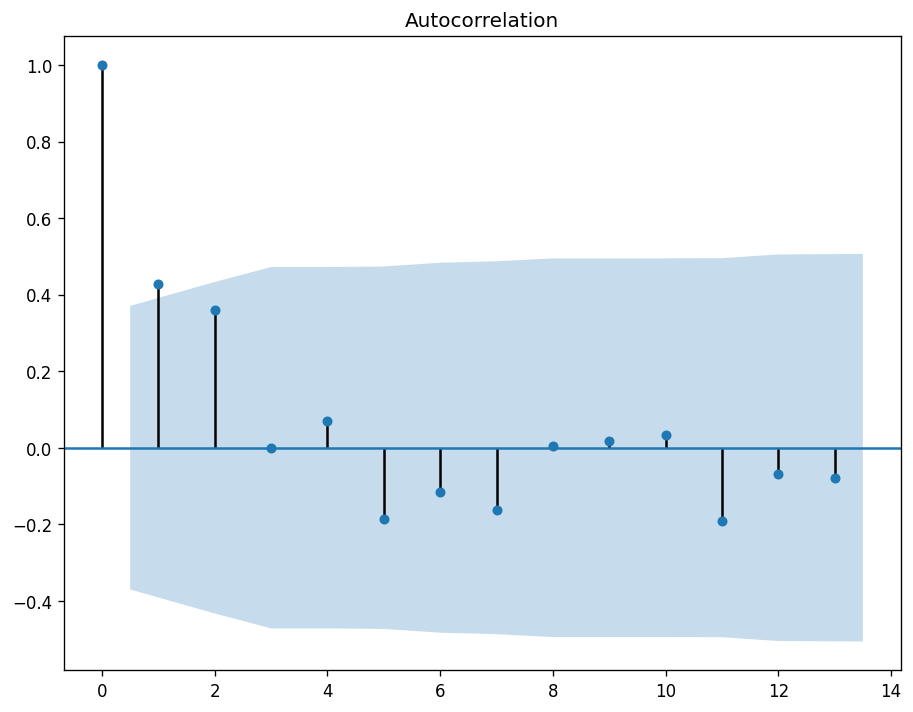

### Testing For Stationarity
. . . . . . . . . . .
ADF Test Statistic : -2.331241268150113
p-value : 0.1620898854701227
#Lags Used : 4
Number of Observations Used : 23
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
85 : label 
intensity desc.

count    28.000000
mean      0.332073
std       0.138776
min       0.066667
25%       0.220588
50%       0.345098
75%       0.433333
max       0.552941
Name: int, dtype: float64
. . . . . . . . . . . 
AxesSubplot(0.125,0.125;0.775x0.755)


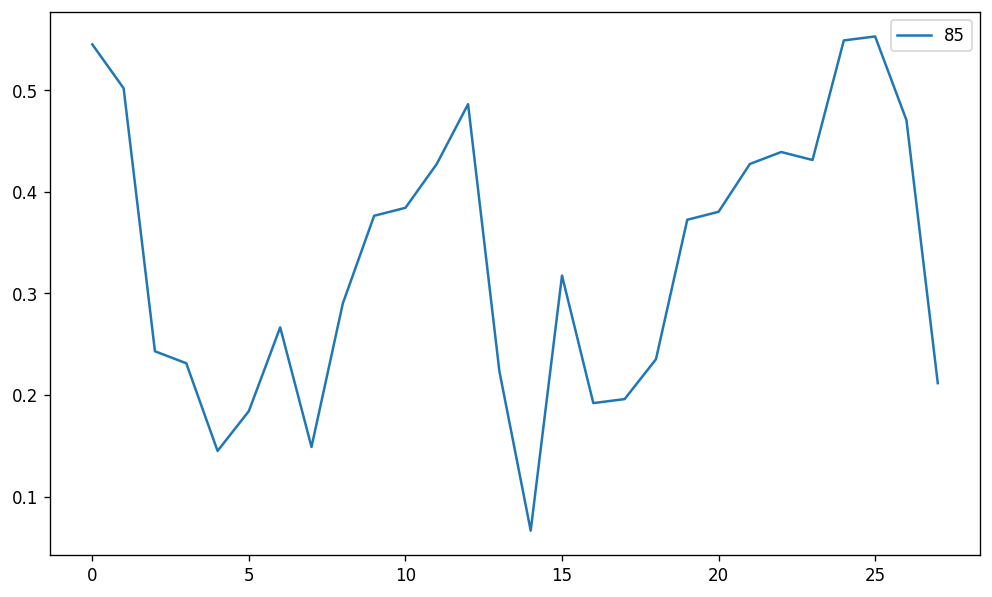

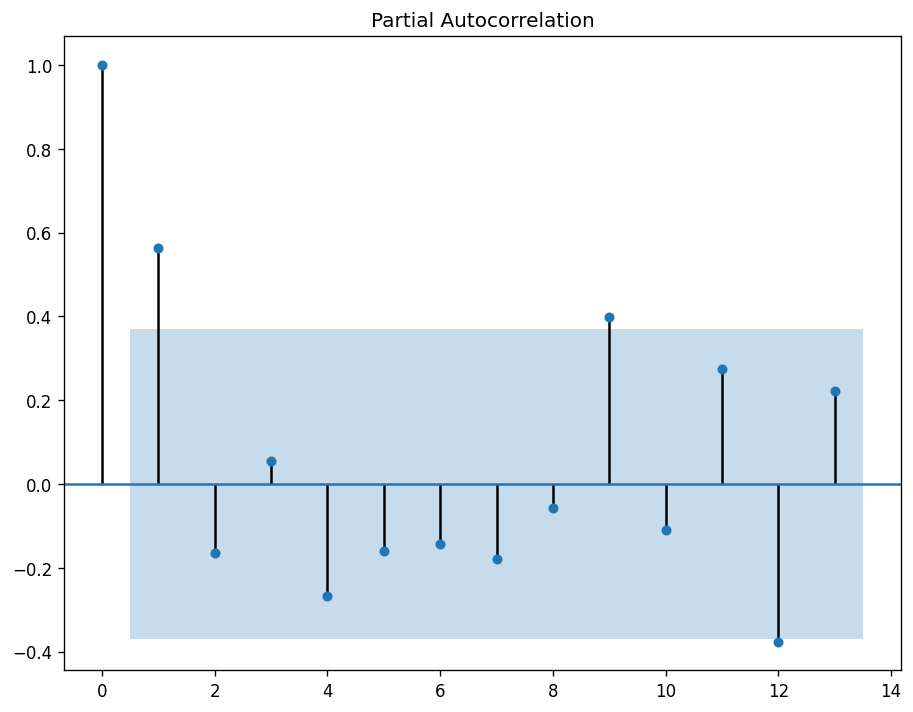

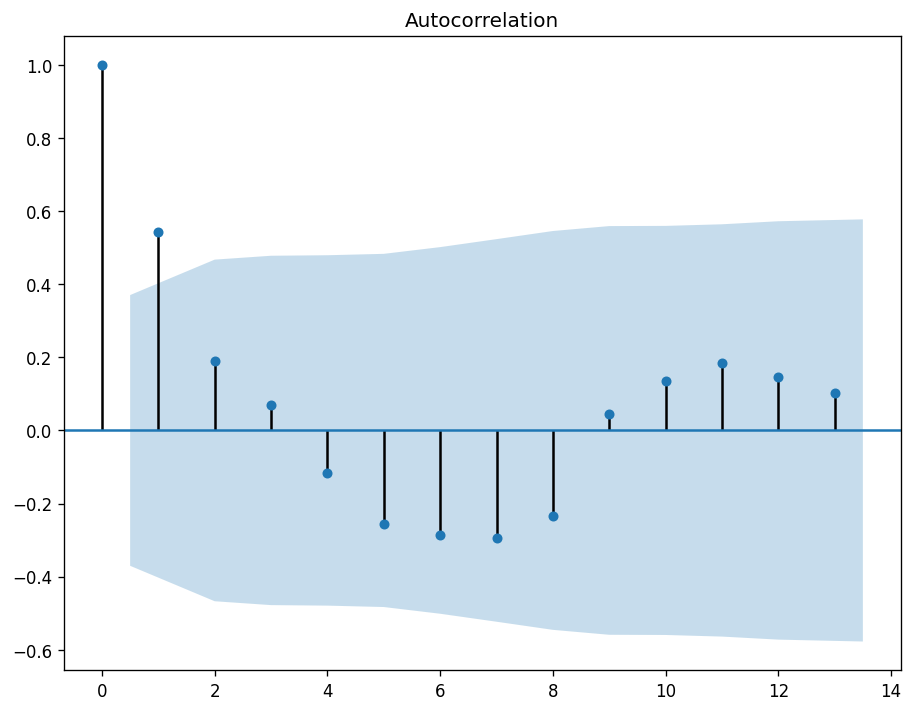

### Testing For Stationarity
. . . . . . . . . . .
ADF Test Statistic : -2.77900984048435
p-value : 0.06133518048994972
#Lags Used : 0
Number of Observations Used : 27
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
--------------------------------------------------------------------------------------


In [ ]:
for x in dict:
	#dict[x]
  timeseries(dict[x])
	#ans_data[dict[x]]

In [ ]:
ans_data[29890]

In [ ]:
df = pd.DataFrame(ans_data[29890],columns=['coh','int'])
df

In [ ]:
df_51 = pd.DataFrame(ans_data[42777],columns=['coh','int'])
df_51

In [ ]:
print("intensity desc.\n")
print(df['int'].describe())

In [ ]:
df['int'].plot(figsize=(5, 2))

In [ ]:
df_51['int'].plot(figsize=(5, 2))

In [ ]:
plot_pacf(df['int'],lags=13).figsize=(1,1)

In [ ]:
plot_pacf(df_51['int'],lags=13).figsize=(1,1)

In [ ]:
plot_acf(df['int'],lags=13).figsize=(1,1)

In [ ]:
plot_acf(df_51['int'],lags=13).figsize=(1,1)

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
#test_result=adfuller(df['int'])

In [ ]:
#Ho: It is non stationary(hypothesis)
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
type(df['int_avg'])

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df_51['int'])

In [ ]:
#Ho: It is non stationary(hypothesis)
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['int'])

# **Testing**

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

KeyError: ignored

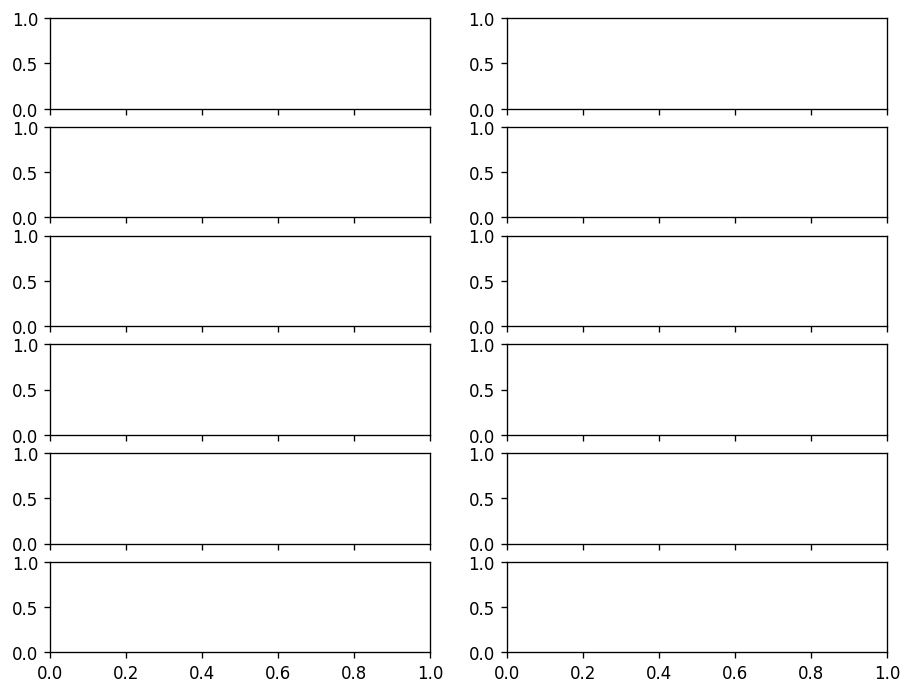

In [ ]:
# Original Series
fig, axes = plt.subplots(6, 2, sharex=True)
axes[0, 0].plot(df['int']); axes[0, 0].set_title('Original Series')
plot_acf(df['int'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['int'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['int'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['int'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['int'].diff().diff().dropna(), ax=axes[2, 1])

# 3nd Differencing
axes[3, 0].plot(df['int'].diff().diff().diff()); axes[3, 0].set_title('3nd Order Differencing')
plot_acf(df['int'].diff().diff().diff().dropna(), ax=axes[3, 1])

# 4nd Differencing
axes[4, 0].plot(df['int'].diff().diff().diff().diff()); axes[4, 0].set_title('4nd Order Differencing')
plot_acf(df['int'].diff().diff().diff().diff().dropna(), ax=axes[4, 1])
# 5th Differencing
axes[5, 0].plot(df['int'].diff().diff().diff().diff().diff()); axes[5, 0].set_title('5th Order Differencing')
plot_acf(df['int'].diff().diff().diff().diff().diff().dropna(), ax=axes[5, 1])

plt.show()

random test

In [ ]:
ans_data[29890]